#### Import of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [2]:
df1 = pd.read_csv('datasets/nursery/nursery.csv')
df = df1.head(1000)

# Health: 0 for not_recom, 1 for recommended, 2 for priority
df=df.replace("not_recom",0)
df=df.replace("recommended",1)
df=df.replace("priority",2)

# Social: 0 for problematic, 1 for slightly_prob, 2 for nonprob
df=df.replace("problematic",0)
df=df.replace("slightly_prob",1)
df=df.replace("nonprob",2)


# Finance: 0 for inconv, 1 for convenient
df['Finance']=df['Finance'].replace("inconv",0)
df['Finance']=df['Finance'].replace("convenient",1)

# Housing: 0 for critical, 1 for less_conv, 2 for convenient
df['Housing']=df['Housing'].replace("critical",0)
df['Housing']=df['Housing'].replace("less_conv",1)
df['Housing']=df['Housing'].replace("convenient",2)

# Children: more is 4
df['Children']=df['Children'].replace("more",4)
df['Children']=df['Children'].replace("3",3)
df['Children']=df['Children'].replace("2",2)
df['Children']=df['Children'].replace("1",1)

# Parents: 0 for pretentious, 1 for usual, 2 for great_pret
df['Parents']=df['Parents'].replace("pretentious",0)
df['Parents']=df['Parents'].replace("usual",1)
df['Parents']=df['Parents'].replace("great_pret",2)

# Has_nurs: 0 for improper, 1 for less_proper, 2 for proper, 3 for critical, 4 for very_crit
df['Has_nurs']=df['Has_nurs'].replace("improper",0)
df['Has_nurs']=df['Has_nurs'].replace("less_proper",1)
df['Has_nurs']=df['Has_nurs'].replace("proper",2)
df['Has_nurs']=df['Has_nurs'].replace("critical",3)
df['Has_nurs']=df['Has_nurs'].replace("very_crit",4)

# Form: 0 for foster, 1 for incomplete, 2 for completed, 3 for complete
df['Form']=df['Form'].replace("foster",0)
df['Form']=df['Form'].replace("incomplete",1)
df['Form']=df['Form'].replace("completed",2)
df['Form']=df['Form'].replace("complete",3)



In [3]:
df.head(5)

,Parents,Has_nurs,Form,Children,Housing,Finance,Social,Health,Class
0,1,2,3,1,2,1,2,1,recommend
1,1,2,3,1,2,1,2,0,0
2,1,2,3,1,2,1,1,2,2
3,1,2,3,1,2,1,0,1,2
4,1,2,3,1,2,1,0,2,2


In [4]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Parents   1000 non-null   int64 
 1   Has_nurs  1000 non-null   int64 
 2   Form      1000 non-null   int64 
 3   Children  1000 non-null   int64 
 4   Housing   1000 non-null   int64 
 5   Finance   1000 non-null   int64 
 6   Social    1000 non-null   int64 
 7   Health    1000 non-null   int64 
 8   Class     1000 non-null   object
dtypes: int64(8), object(1)
memory usage: 70.4+ KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

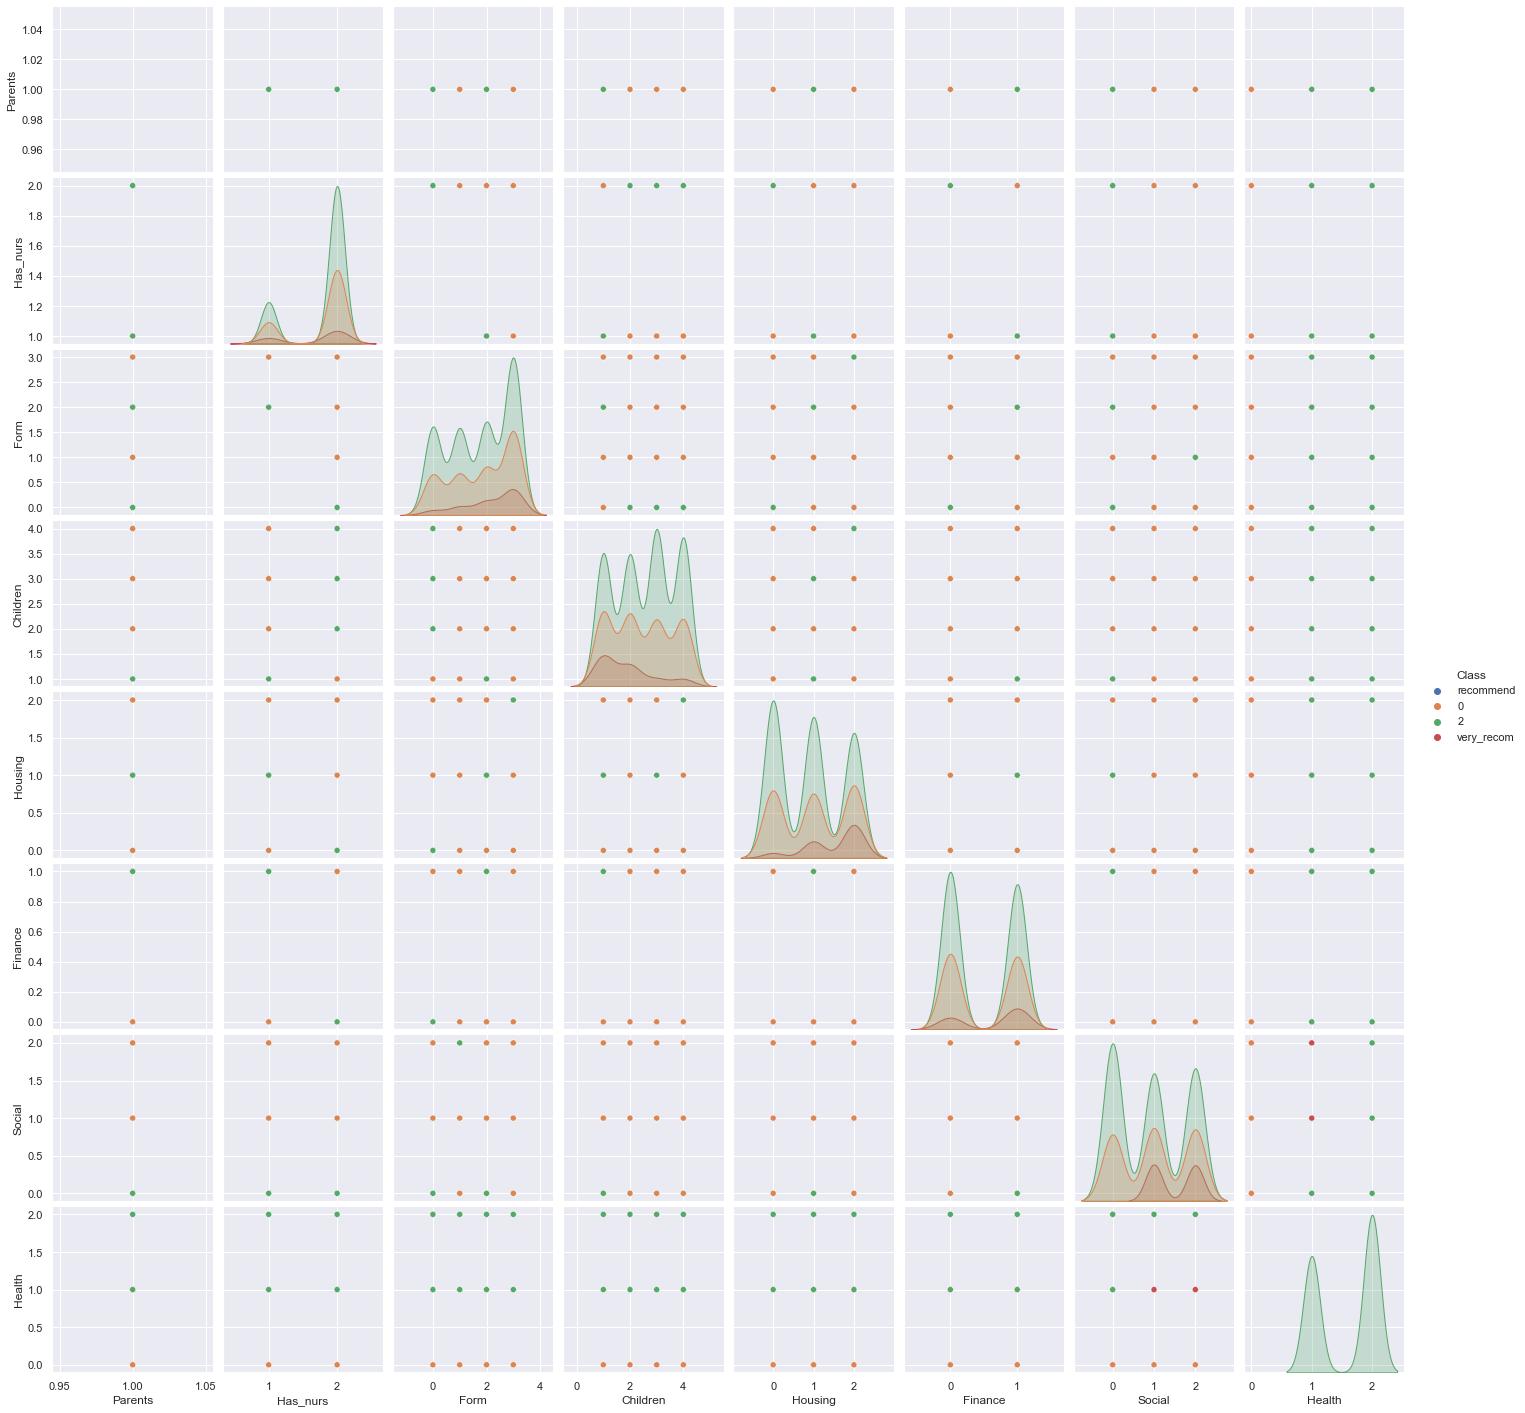

In [5]:
sns.pairplot(df, hue='Class')
plt.show()

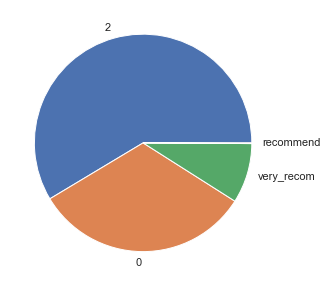

In [6]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [7]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Parents,1000.0,1.000,0.000000,1.0,1.0,1.0,1.0,1.0
Has_nurs,1000.0,1.778,0.415799,1.0,2.0,2.0,2.0,2.0
Form,1000.0,1.813,1.149501,0.0,1.0,2.0,3.0,3.0
Children,1000.0,2.463,1.124231,1.0,1.0,2.0,3.0,4.0
Housing,1000.0,1.010,0.822543,0.0,0.0,1.0,2.0,2.0
Finance,1000.0,0.498,0.500246,0.0,0.0,0.0,1.0,1.0
Social,1000.0,1.018,0.815071,0.0,0.0,1.0,2.0,2.0
Health,1000.0,1.013,0.813322,0.0,0.0,1.0,2.0,2.0


#### Standardize the Data

In [8]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Parents,1000.0,0.000000e+00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
Has_nurs,1000.0,1.136868e-16,1.0005,-1.872032,0.534179,0.534179,0.534179,0.534179
Form,1000.0,5.684342e-17,1.0005,-1.577995,-0.707617,0.162761,1.033139,1.033139
Children,1000.0,-7.815970e-17,1.0005,-1.301985,-1.301985,-0.412043,0.477899,1.367841
Housing,1000.0,8.881784e-19,1.0005,-1.228514,-1.228514,-0.012164,1.204187,1.204187
Finance,1000.0,-6.750156e-17,1.0005,-0.996008,-0.996008,-0.996008,1.004008,1.004008
Social,1000.0,1.421085e-17,1.0005,-1.249596,-1.249596,-0.022095,1.205406,1.205406
Health,1000.0,1.434408e-16,1.0005,-1.246133,-1.246133,-0.015992,1.214149,1.214149


#### Observations and Variables

In [9]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

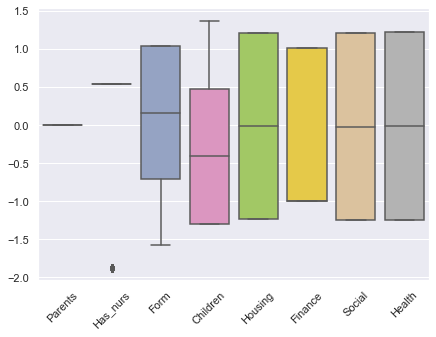

In [10]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

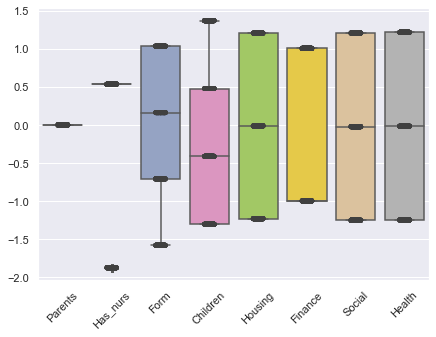

In [11]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

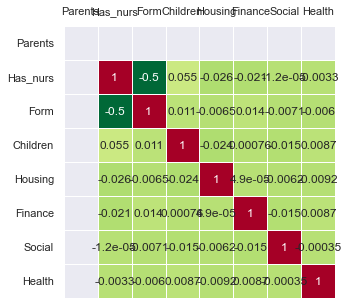

In [12]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [13]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [14]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.502893,-1.517600,0.477183,-1.215204,-0.739735,-0.702933,1.287435
1,0.508329,-1.950996,0.474850,-0.271105,-1.394981,-0.769058,1.269115
2,0.509472,-0.710694,1.274374,-1.680520,0.295147,-0.035266,1.295937
3,0.526922,-0.770579,2.066900,-0.257638,0.019537,0.500150,1.267798
4,0.521486,-0.337184,2.069232,-1.201737,0.674783,0.566275,1.286118
...,...,...,...,...,...,...,...
995,1.562448,-1.433388,-0.103282,-0.351221,-1.850107,-0.035072,-1.089127
996,1.563591,-0.193087,0.696241,-1.760637,-0.159978,0.698720,-1.062305
997,1.574463,-1.059878,0.691576,0.127562,-1.470470,0.566469,-1.098946
998,1.581042,-0.252972,1.488767,-0.337754,-0.435588,1.234136,-1.090444


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'7 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (21.5% expl.var)', ylabel='PC2 (14.7% expl.var)'>)

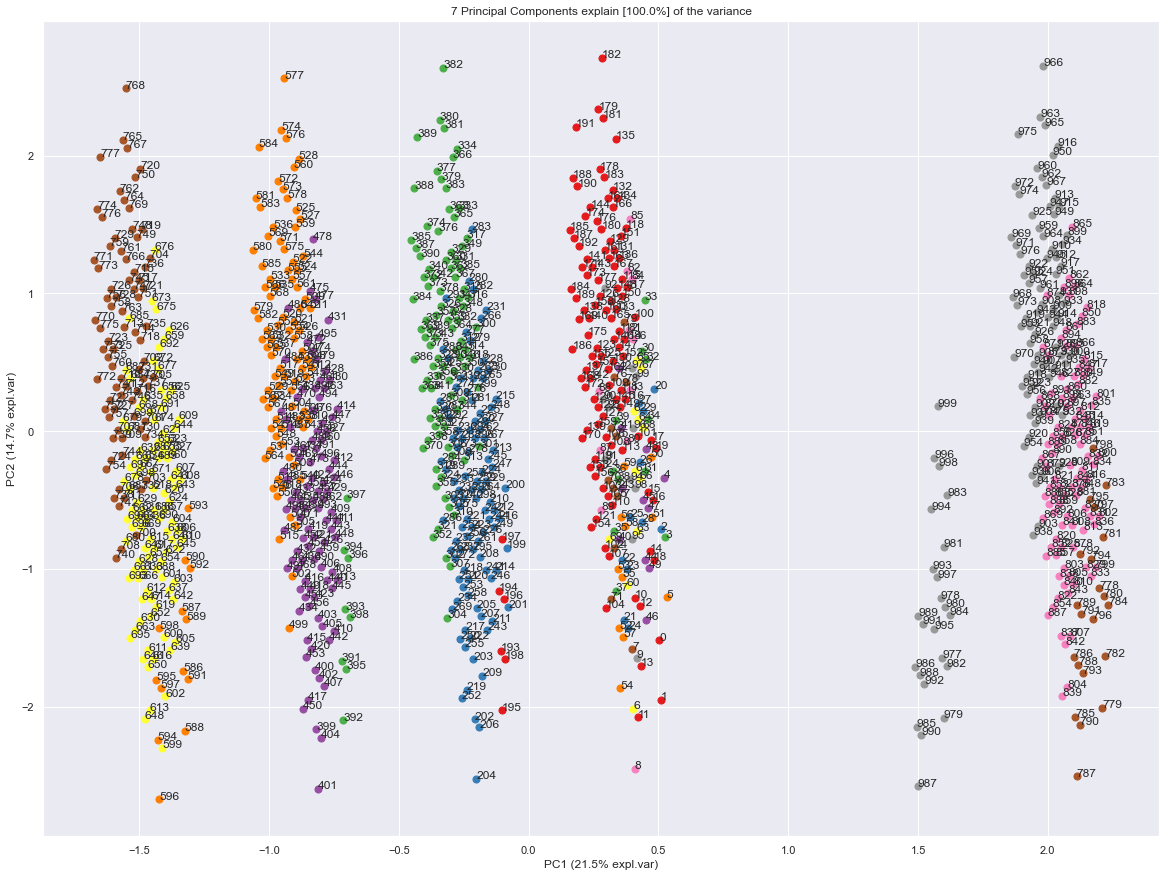

In [15]:
model.scatter(label=True, legend=False)

Eigenvectors

In [16]:
A = out['loadings'].T

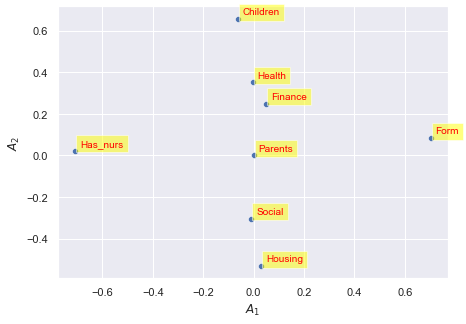

In [17]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

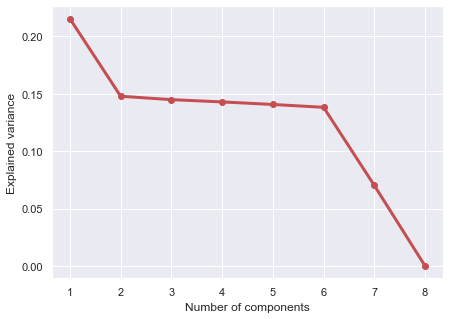

In [18]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

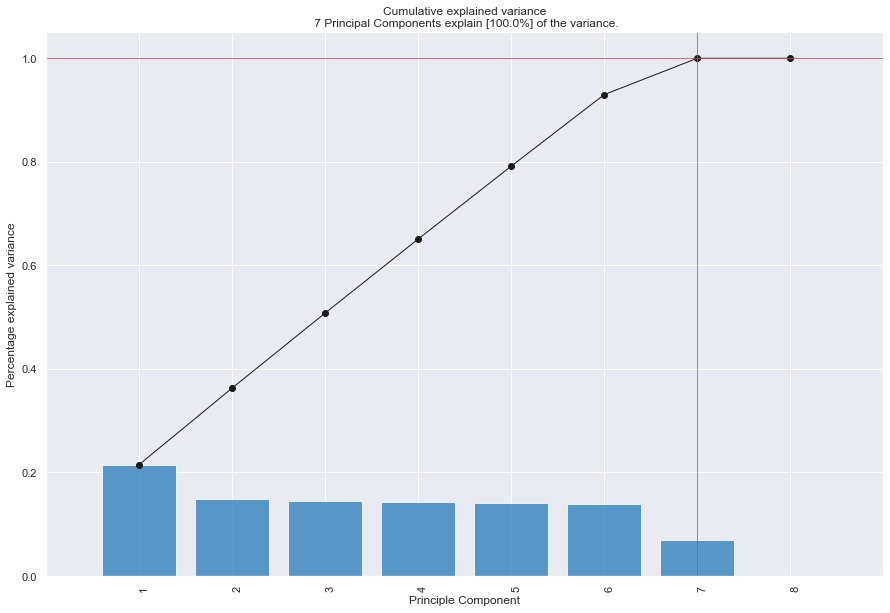

<Figure size 504x360 with 0 Axes>

In [19]:
model.plot();